# Metegol


Metegol (2013), dirigida por Juan José Campanella, es una película argentina animada basada en el cuento "Memorias de un wing derecho" de Roberto Fontanarrosa. La trama sigue a Amadeo, un joven tímido experto en metegol, quien debe enfrentarse al egocéntrico El Crack, un futbolista profesional que regresa al pueblo para vengarse y destruirlo.

Con un fuerte uso del español "Argentino", lleno de modismos y humor local, los jugadores del metegol cobran vida para ayudar a Amadeo a salvar su hogar en un partido épico. La película destaca por sus referencias al fútbol y un lenguaje que refuerza su identidad cultural argentina.

#### Instalamos requisitos

In [25]:
%pip install networkx
%pip install matplotlib
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Cadenas de Markov

Entrenamos el modelo

In [26]:
import re
import random
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

class MarkovChainPredictor:
    def __init__(self):
        self.transition_matrix = defaultdict(lambda: defaultdict(int))
        self.terminal_states = set([".", "?"])

    def train(self, text):
        """
        Entrena el modelo de cadenas de Markov usando un texto dado.
        
        :param text: Cadena con el texto de entrenamiento.
        """
        words = re.findall(r'\w+|[.!?]', text)
        for i in range(len(words) - 1):
            current_word = words[i]
            next_word = words[i + 1]
            self.transition_matrix[current_word][next_word] += 1

    def print_transition_matrix_for_word(self, word):
        """
        Imprime la matriz de transición para una palabra específica.
        
        :param word: La palabra para la que se quiere imprimir la matriz de transición.
        """
        if word in self.transition_matrix:
            print(f"Transiciones para la palabra '{word}':")
            for next_word, count in self.transition_matrix[word].items():
                print(f"  {next_word}: {count}")
        else:
            print(f"La palabra '{word}' no tiene transiciones registradas.")

    def predict_next_word(self, current_word):
        """
        Predice la siguiente palabra basada en el modelo de cadenas de Markov.
        
        :param current_word: La palabra actual.
        :return: La siguiente palabra predicha o None si no hay una predicción.
        """
        next_words = self.transition_matrix[current_word]
        if not next_words:
            return None

        total_transitions = sum(next_words.values())
        words, probabilities = zip(*[(word, count / total_transitions) for word, count in next_words.items()])

        return random.choices(words, probabilities)[0]

    def generate_sentence(self, start_word):
        """
        Genera una oración a partir de una palabra inicial hasta llegar a un estado terminal.
        
        :param start_word: La palabra inicial de la oración.
        :return: Una oración generada como cadena.
        """
        current_word = start_word
        sentence = [current_word]

        while current_word not in self.terminal_states:
            next_word = self.predict_next_word(current_word)
            if not next_word:
                break
            sentence.append(next_word)
            current_word = next_word

        return " ".join(sentence)
    
    def visualize_transitions(self, word):
        """
        Crea una visualización de las transiciones de una palabra específica.
        
        :param word: La palabra para la que se quiere visualizar las transiciones.
        """
        if word not in self.transition_matrix:
            print(f"La palabra '{word}' no tiene transiciones registradas.")
            return

        G = nx.DiGraph()

        for next_word, count in self.transition_matrix[word].items():
            G.add_edge(word, next_word, weight=count)

        pos = nx.spring_layout(G)  # Posición de los nodos
        plt.figure(figsize=(10, 6))

        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

        edges = G.edges(data=True)
        nx.draw_networkx_edges(
            G, pos, edgelist=edges,
            width=[data['weight'] for _, _, data in edges]
        )

        nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
        edge_labels = {(u, v): d['weight'] for u, v, d in edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title(f"Transiciones para la palabra '{word}'")
        plt.axis("off")
        plt.show()

In [27]:
with open("metegol_limpio.txt", "r", encoding="utf-8") as file:
    texto_entrenamiento = file.read()


In [28]:
markov_predictor = MarkovChainPredictor()
markov_predictor.train(texto_entrenamiento)

Imprimos la matrix de posibles palabras a continuacion de "gol"

In [29]:
markov_predictor.print_transition_matrix_for_word("gol")

Transiciones para la palabra 'gol':
  .: 3
  ni: 1
  !: 5
  de: 1


Generamos cinco oraciones a partir de la palabra "gol" y otras cinco a partir de la palabra "Amadeo". Este mismo proceso se puede aplicar con otras palabras

In [30]:
for x in range(5):
    oracion_generada = markov_predictor.generate_sentence("gol")
    print(oracion_generada)

gol de aquí ?
gol de su alrededor .
gol ! Pulpo ! El verde no le pega ! Hay tantas cosas .
gol .
gol .


In [31]:
for x in range(5):
    oracion_generada = markov_predictor.generate_sentence("Amadeo")
    print(oracion_generada)

Amadeo .
Amadeo de adorno ?
Amadeo intentando torcer el Grosso .
Amadeo .
Amadeo que se dice Pasión ! Piel de chatarra con una vista certera un toro imposible de las reglas no entró ! Inútiles ! Increíble ! La culpa la posición del norte de gallina .


Podemos imprimir y visualizar cuales son los caracteres o palabras que mas le siguen a la palabra "Gol"

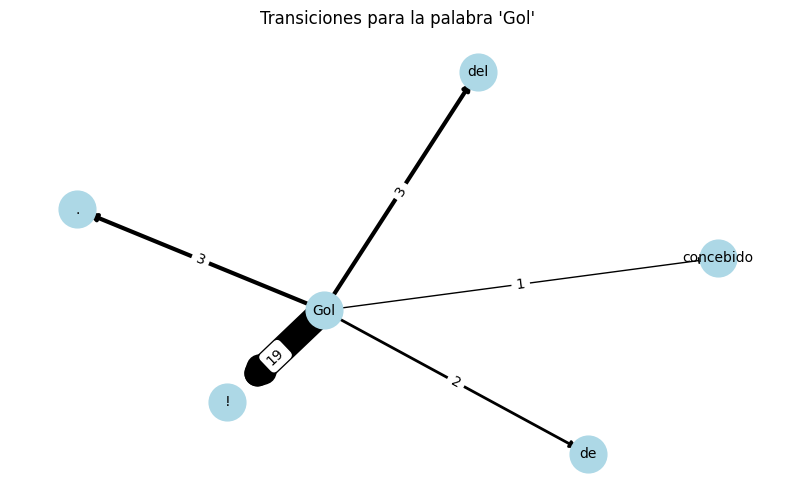

In [32]:
markov_predictor.visualize_transitions("Gol")

### N-gramas

Entrenamos el modelo

In [33]:
import re
import random
from collections import defaultdict, Counter

class NgramModel:
    def __init__(self, n):
        self.n = n
        self.ngram_counts = defaultdict(lambda: defaultdict(int))
        self.global_word_counts = defaultdict(int)  # Frecuencia global de palabras

    def train(self, text):
        """
        Entrena el modelo de n-gramas usando un texto dado.
        """
        text = text.lower()  # Ignorar mayúsculas y minúsculas
        words = re.findall(r'\w+|[.,!?;:]', text)
        for i in range(len(words) - self.n + 1):
            ngram = tuple(words[i:i + self.n - 1])
            next_word = words[i + self.n - 1]
            self.ngram_counts[ngram][next_word] += 1

        # Contar frecuencias globales de palabras
        for word in words:
            self.global_word_counts[word] += 1

    def complete_sentence(self, partial_sentence):
        """
        Completa la frase dada (con una palabra faltante).
        """
        partial_sentence = partial_sentence.lower()  # Convertir a minúsculas
        words = re.findall(r'\w+', partial_sentence)

        if len(words) < self.n - 1:
            raise ValueError(f"La frase debe tener al menos {self.n - 1} palabras para completar.")

        # Tomar las últimas (n-1) palabras del contexto dado
        context = words[-(self.n - 1):]
        next_word = self.predict_next_word(context)
        
        # Devolver la frase completada
        return ' '.join(words) + ' ' + next_word

    def predict_next_word(self, context):
        """
        Predice la siguiente palabra basándose en el contexto de n-1 palabras.
        Si el contexto no existe, selecciona una palabra basada en coincidencias parciales o globales.
        """
        if len(context) != self.n - 1:
            raise ValueError(f"El contexto debe tener {self.n - 1} palabras.")

        context_tuple = tuple(context)
        next_word_candidates = self.ngram_counts.get(context_tuple, None)

        if next_word_candidates:
            # Caso 1: El contexto existe exactamente
            words, counts = zip(*next_word_candidates.items())
            probabilities = [count / sum(counts) for count in counts]
            # print(f"Candidatos exactos: {words}, Probabilidades: {probabilities}")
            return random.choices(words, probabilities)[0]
        else:
            # Caso 2: Buscar coincidencias parciales
            partial_matches = self.find_partial_matches(context)
            if partial_matches:
                words, counts = zip(*partial_matches.items())
                probabilities = [count / sum(counts) for count in counts]
                # print(f"Candidatos parciales: {words}, Probabilidades: {probabilities}")
                return random.choices(words, probabilities)[0]
            else:
                # Caso 3: Selección aleatoria global como último recurso
                # print(f"El contexto {' '.join(context)} no tiene coincidencias exactas ni parciales.")
                words, counts = zip(*self.global_word_counts.items())
                probabilities = [count / sum(counts) for count in counts]
                return random.choices(words, probabilities)[0]
                pass

    def find_partial_matches(self, context):
        """
        Encuentra palabras que podrían ser candidatas basándose en coincidencias parciales del contexto.
        """
        matches = Counter()
        for ngram, next_words in self.ngram_counts.items():
            # Verifica cuántas palabras del contexto están presentes en el ngram
            if any(word in ngram for word in context):
                for word, count in next_words.items():
                    matches[word] += count
        return matches


In [34]:
with open("metegol_limpio.txt", "r", encoding="utf-8") as file:
        texto_entrenamiento = file.read()

Probamos con distintos valor de N para verificar si el contexto utilizado genera alguna diferencia en el resultado

In [65]:
model = NgramModel(n=4)
model.train(texto_entrenamiento)

# Frase inicial
partial_sentence = "vamos amadeo que"
    
# Generar una secuencia de 5 frases a partir de la frase inicial
for _ in range(10):
    completed_sentence = model.complete_sentence(partial_sentence)
        
    # Actualizar la frase parcial con la nueva frase generada (última palabra)
    partial_sentence = completed_sentence

print(f"Frase generada: {completed_sentence}")

Frase generada: vamos amadeo que este llevaron nos pueblo muy aniquilan lejos .


In [48]:
model = NgramModel(n=2)
model.train(texto_entrenamiento)

# Frase inicial
partial_sentence = "vamos amadeo que"
    
# Generar una secuencia de 5 frases a partir de la frase inicial
for _ in range(10):
    completed_sentence = model.complete_sentence(partial_sentence)        
    # Actualizar la frase parcial con la nueva frase generada (última palabra)
    partial_sentence = completed_sentence

print(f"Frase generada: {completed_sentence}")

Frase generada: vamos amadeo que fueron estos representan el esófago !


Otro ejemplo...

In [46]:
model = NgramModel(n=2)
model.train(texto_entrenamiento)

# Frase inicial
partial_sentence = "tu eres"
    
# Generar una secuencia de 5 frases a partir de la frase inicial
for _ in range(10):
    completed_sentence = model.complete_sentence(partial_sentence)        
    # Actualizar la frase parcial con la nueva frase generada (última palabra)
    partial_sentence = completed_sentence

print(f"Frase generada: {completed_sentence}")

Frase generada: tu eres el chico tenía una masacre .


In [45]:
model = NgramModel(n=3)
model.train(texto_entrenamiento)

# Frase inicial
partial_sentence = "tu eres"
    
# Generar una secuencia de 5 frases a partir de la frase inicial
for _ in range(10):
    completed_sentence = model.complete_sentence(partial_sentence)        
    # Actualizar la frase parcial con la nueva frase generada (última palabra)
    partial_sentence = completed_sentence

print(f"Frase generada: {completed_sentence}")

Frase generada: tu eres el más rápido del pueblo .
